Import necessary packages.

In [2]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [7]:
### NOTE: it is important here to further declare these variables to be nonzero and positive (otherwise sympy cannot find solution for the FOCs)
e1, e2, es1, es2, alpha1, alpha2, alphas, beta, gamma, w, theta1, theta2 = symbols('e_1, e_2, e_{s1}, e_{s2}, alpha_1, alpha2, alpha_s, beta, gamma, w, theta_1, theta_2', nonzero=True, positive=True)


# 3-player team production setup

### Processors

Two processors, 1 and 2, choose their effort levels independently to maximize their payoffs. 

Under individual pay on their own production, player 1 faces the problem
\begin{align}
    \max_{e_1} 2w(e_1 \alpha_1)^{\beta} (e_{s1} \alpha_s)^{\gamma} - \frac{1}{2}e_1^2
\end{align}
and player 2 faces the problem
\begin{align}
    \max_{e_2} 2w(e_2 \alpha_2)^{\beta} (e_{s2} \alpha_s)^{\gamma} - \frac{1}{2}e_2^2
\end{align}


### Supplier

The supplier of the group chooses efforts towards the cooperation with each player, $e_{s1}$ and $e_{s2}$, so maximize their own payoff of
\begin{align}
    \max_{e_{s1}, e_{s2}} &\quad \overbrace{ w \left( (e_1 \alpha_1)^{\beta} (e_{s1} \alpha_s)^{\gamma} + (e_2 \alpha_2)^{\beta} (e_{s2} \alpha_s)^{\gamma} \right) - \frac{1}{2}(e_{s1}+e_{s2})^2 }^{\text{own private payoff}} \\
        & \qquad \underbrace{ + \theta_1 \left( 2w(e_1 \alpha_1)^{\beta} (e_{s1} \alpha_s)^{\gamma} - \frac{1}{2}e_1^2 \right) + \theta_2 \left( 2w(e_2 \alpha_2)^{\beta} (e_{s2} \alpha_s)^{\gamma} - \frac{1}{2}e_2^2 \right) }_{\text{social incentives}}
\end{align}

# Analysis

## Solve for the Nash equilibrium of the game

### Solve the players' best responses given beliefs about team members' effort levels

Note: we omit the hats here to simplify the notations. 

### Processor's problem

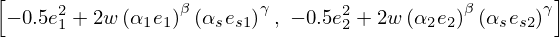

In [8]:
# define payoff function for the processors (equation 10 in appendix)
u1 = 2*w* (e1*alpha1)**beta * (es1*alphas)**gamma - 1/2 * e1**2
u2 = 2*w* (e2*alpha2)**beta * (es2*alphas)**gamma - 1/2 * e2**2
# check profit function
[u1, u2]

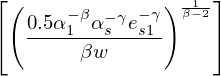

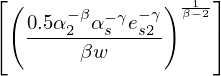

In [9]:
# solve for processors' best response functions (equation 11 in appendix)
e1br_sol = solve(u1.diff(e1), e1)
display(e1br_sol)
e2br_sol = solve(u2.diff(e2), e2)
display(e2br_sol)

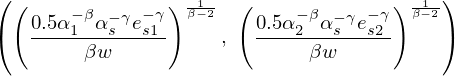

In [10]:
# retrieve the first element of these solutions
e1br = e1br_sol[0].simplify()
e2br = e2br_sol[0].simplify()
e1br, e2br

In markdown, we can type up the processors' best response functions
\begin{align}
    e_1 &= \left( 2 w \beta (e_{s1} \alpha_s)^{\gamma} \alpha_1^{\beta} \right)^{\frac{1}{2-\beta}} \tag{P1} \\
    e_2 &= \left( 2 w \beta (e_{s2} \alpha_s)^{\gamma} \alpha_2^{\beta} \right)^{\frac{1}{2-\beta}} \tag{P2}
\end{align}

#### Plot the processor's best responses

In [19]:
# assume some values on exogenous variables for plots
alpha1_value = 0.5
alphas_value = 0.5
beta_value = 0.5
gamma_value = 0.5
w_value = 10

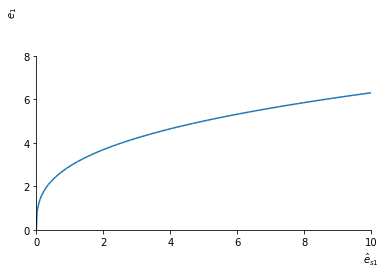

In [21]:
# plot the best response for processor 1
e1plot_fun = e1br.subs([(alpha1,alpha1_value),(alphas,alphas_value),(beta,beta_value),(gamma,gamma_value),(w,w_value)])
e1plot = plot(e1plot_fun, (es1,0,10), ylim=[0,10], xlabel="$\hat{e}_{s1}$", ylabel="$e_1$")

### Supplier's problem

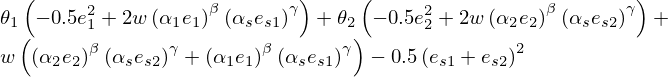

In [14]:
# define payoff function for the supplier (equation 12 in appendix)
us = w*( (e1*alpha1)**beta * (es1*alphas)**gamma + (e2*alpha2)**beta * (es2*alphas)**gamma) - 1/2 * (es1 + es2)**2 + theta1*u1 + theta2*u2
# check profit function
us

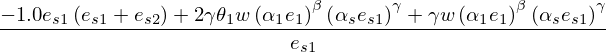

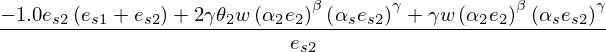

In [18]:
# derive supplier's FOCs (equation 13 in appendix)
display(us.diff(es1).simplify())
display(us.diff(es2).simplify())

In [ ]:
## solve for processors' best response functions (sympy cannot do it)
# esbr_sol = solve( (us.diff(es1), us.diff(es2)), es1, es2)
# display(esbr_sol)


#### Solve for supplier's best responses

\begin{align}
    e_{s1} + e_{s2} &= (1+2\theta_1)w(e_1 \alpha_1)^{\beta} \gamma e_{s1}^{\gamma-1}\alpha_s^{\gamma} \tag{1} \\
    e_{s1} + e_{s2} &= (1+2\theta_2)w(e_2 \alpha_2)^{\beta} \gamma e_{s2}^{\gamma-1}\alpha_s^{\gamma} \tag{2}
\end{align}

Equating (1) and (2), we have
\begin{align}
    && (1+2\theta_1)w(e_1 \alpha_1)^{\beta} \gamma e_{s1}^{\gamma-1}\alpha_s^{\gamma} &= (1+2\theta_2)w(e_2 \alpha_2)^{\beta} \gamma e_{s2}^{\gamma-1}\alpha_s^{\gamma} \\
    \Rightarrow && (1+2\theta_1) (e_1 \alpha_1)^{\beta} e_{s1}^{\gamma-1} &= (1+2\theta_2) (e_2 \alpha_2)^{\beta} e_{s2}^{\gamma-1} \\
    \Rightarrow && \left( \frac{e_{s2}}{e_{s1}} \right)^{\gamma-1} &= \frac{(1+2\theta_1) (e_1 \alpha_1)^{\beta}}{(1+2\theta_2) (e_2 \alpha_2)^{\beta} } \\
    \Rightarrow && \frac{e_{s2}}{e_{s1}}  &= \left( \frac{(1+2\theta_1) (e_1 \alpha_1)^{\beta}}{(1+2\theta_2) (e_2 \alpha_2)^{\beta} } \right)^{\frac{1}{\gamma-1}} \\
    \Rightarrow && \frac{e_{s2}}{e_{s1}}  &= \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{\gamma-1}} \\
    \Rightarrow && e_{s2}  &= \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{\gamma-1}} e_{s1}  \tag{3}
\end{align}

Plugging (3) into (1), we have
\begin{align}
    e_{s1} + e_{s2} &= (1+2\theta_1)w(e_1 \alpha_1)^{\beta} \gamma e_{s1}^{\gamma-1}\alpha_s^{\gamma} \\
    e_{s1} + \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{\gamma-1}} e_{s1} &= (1+2\theta_1)w(e_1 \alpha_1)^{\beta} \gamma e_{s1}^{\gamma-1}\alpha_s^{\gamma} \\
    \left( 1 + \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{\gamma-1}} \right) e_{s1} &= (1+2\theta_1)w(e_1 \alpha_1)^{\beta} \gamma e_{s1}^{\gamma-1}\alpha_s^{\gamma} \\
    e_{s1} &= \frac{ (1+2\theta_1)w(e_1 \alpha_1)^{\beta} \gamma e_{s1}^{\gamma-1}\alpha_s^{\gamma} }{  1 + \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{\gamma-1}}  } \\
    \frac{e_{s1}}{e_{s1}^{\gamma-1}} &= \frac{ (1+2\theta_1)w(e_1 \alpha_1)^{\beta} \gamma \alpha_s^{\gamma} }{  1 + \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{\gamma-1}}  } \\
    e_{s1}^{1-(\gamma-1)} &= \frac{ (1+2\theta_1)w(e_1 \alpha_1)^{\beta} \gamma \alpha_s^{\gamma} }{  1 + \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{\gamma-1}}  } \\
    e_{s1}^{2-\gamma} &= \frac{ (1+2\theta_1)w(e_1 \alpha_1)^{\beta} \gamma \alpha_s^{\gamma} }{  1 + \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{\gamma-1}}  } \\
    e_{s1} &= \left( \frac{ (1+2\theta_1)w(e_1 \alpha_1)^{\beta} \gamma \alpha_s^{\gamma} }{  1 + \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{\gamma-1}}  } \right)^{\frac{1}{2-\gamma}} \tag{S1}
\end{align}
which is equation (14) in the paper appendix (I believe there might be a typo in the appendix equation).

Similarly, we can find the best response for $e_{s2}$
\begin{align}
    e_{s2} &= \left( \frac{ (1+2\theta_2)w(e_2 \alpha_2)^{\beta} \gamma \alpha_s^{\gamma} }{  1 + \left( \frac{1+2\theta_2} {1+2\theta_1} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_2 \alpha_2}{e_1 \alpha_1} \right)^{\frac{\beta}{\gamma-1}}  } \right)^{\frac{1}{2-\gamma}}   \tag{S2}
\end{align}

### Nash Equilibrium

The Nash equilibrium of this model is determined by the following four first order conditions, where each player chooses their best responses according the correct beliefs about each others' strategies
\begin{align}
    e_1 &= \left( 2 w \beta (e_{s1} \alpha_s)^{\gamma} \alpha_1^{\beta} \right)^{\frac{1}{2-\beta}} \tag{P1} \\
    e_2 &= \left( 2 w \beta (e_{s2} \alpha_s)^{\gamma} \alpha_2^{\beta} \right)^{\frac{1}{2-\beta}} \tag{P2} \\
    e_{s1} &= \left( \frac{ (1+2\theta_1)w(e_1 \alpha_1)^{\beta} \gamma \alpha_s^{\gamma} }{  1 + \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{\gamma-1}}  } \right)^{\frac{1}{2-\gamma}} \tag{S1} \\
    e_{s2} &= \left( \frac{ (1+2\theta_2)w(e_2 \alpha_2)^{\beta} \gamma \alpha_s^{\gamma} }{  1 + \left( \frac{1+2\theta_2} {1+2\theta_1} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_2 \alpha_2}{e_1 \alpha_1} \right)^{\frac{\beta}{\gamma-1}}  } \right)^{\frac{1}{2-\gamma}}   \tag{S2}
\end{align}

### Solve for equilibrium efforts

Dividing (P1) by (P2), we have
\begin{align}
    && \frac{e_1}{e_2} &= \left( \frac{2 w \beta (e_{s1} \alpha_s)^{\gamma} \alpha_1^{\beta}}{2 w \beta (e_{s2} \alpha_s)^{\gamma} \alpha_2^{\beta} } \right)^{\frac{1}{2-\beta}} 
    \\
    &&   &= \left( \frac{e_{s1}^{\gamma} \alpha_1^{\beta}}{ e_{s2} ^{\gamma} \alpha_2^{\beta} } \right)^{\frac{1}{2-\beta}} 
    \\
    \Rightarrow && \frac{e_1 \alpha_1 }{e_2 \alpha_2 } &= \left( \frac{e_{s1}^{\gamma} \alpha_1^{\beta}}{ e_{s2} ^{\gamma} \alpha_2^{\beta} } \right)^{\frac{1}{2-\beta}} \frac{\alpha_1}{\alpha_2}
    \\
    &&   &= \left( \frac{e_{s1}}{e_{s2}} \right)^{\frac{\gamma}{2-\beta}} \left( \frac{\alpha_1}{\alpha_2} \right)^{\frac{\beta}{2-\beta}} \frac{\alpha_1}{\alpha_2}
    \\
    \Rightarrow &&  \frac{e_1 \alpha_1 }{e_2 \alpha_2 }  &= \left( \frac{e_{s1}}{e_{s2}} \right)^{\frac{\gamma}{2-\beta}} \left( \frac{\alpha_1}{\alpha_2} \right)^{\frac{2}{2-\beta}}  
\end{align}

Now, plug (3) into this equation above, we have
\begin{align}
    && \frac{e_1 \alpha_1 }{e_2 \alpha_2 }  &= \left( \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{1-\gamma}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{1-\gamma}} \right)^{\frac{\gamma}{2-\beta}} \left( \frac{\alpha_1}{\alpha_2} \right)^{\frac{2}{2-\beta}}  
    \\
    &&   &= \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{\gamma}{(1-\gamma)(2-\beta)}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta \gamma}{(1-\gamma)(2-\beta)}} \left( \frac{\alpha_1}{\alpha_2} \right)^{\frac{2}{2-\beta}}  
    \\
    \Rightarrow && \frac{e_1 \alpha_1 }{e_2 \alpha_2 } \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{- \frac{\beta \gamma}{(1-\gamma)(2-\beta)}}  &= \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{\gamma}{(1-\gamma)(2-\beta)}}  \left( \frac{\alpha_1}{\alpha_2} \right)^{\frac{2}{2-\beta}}  
    \\
    \Rightarrow && \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{ \frac{2 - \beta - 2\gamma}{(1-\gamma)(2-\beta)}}  &= \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{\gamma}{(1-\gamma)(2-\beta)}}  \left( \frac{\alpha_1}{\alpha_2} \right)^{\frac{2}{2-\beta}} 
    \\
    \Rightarrow && \frac{e_1 \alpha_1}{e_2 \alpha_2}  &= \left( \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{\gamma}{(1-\gamma)(2-\beta)}}  \left( \frac{\alpha_1}{\alpha_2} \right)^{\frac{2}{2-\beta}}  \right)^{ \frac{(1-\gamma)(2-\beta)}{2 - \beta - 2\gamma} }
    \\
    \Rightarrow && \frac{e_1 \alpha_1}{e_2 \alpha_2}  &=  \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{\gamma}{2 - \beta - 2\gamma}}  \left( \frac{\alpha_1}{\alpha_2} \right)^{\frac{2(1-\gamma)}{2 - \beta - 2\gamma}}  \tag{E12}
\end{align}

which is entirely an expression of exogenous variables. 

Expression (E12) allows us to rewrite (S1) and (S2) in simpler forms as
\begin{align}
    e_{s1} &= \underbrace{ \left( \frac{ (1+2\theta_1)w \alpha_1^{\beta} \gamma \alpha_s^{\gamma} }{  1 + \left( \frac{1+2\theta_1} {1+2\theta_2} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_1 \alpha_1}{e_2 \alpha_2} \right)^{\frac{\beta}{\gamma-1}}  } \right)^{\frac{1}{2-\gamma}} }_{\text{define as: }D_1} e_1^{\frac{\beta}{2-\gamma}} 
    = D_1 e_1^{\frac{\beta}{2-\gamma}} \tag{S1'}
    \\
    e_{s2} &= \underbrace{ \left( \frac{ (1+2\theta_2)w \alpha_2^{\beta} \gamma \alpha_s^{\gamma} }{  1 + \left( \frac{1+2\theta_2} {1+2\theta_1} \right)^{\frac{1}{\gamma-1}}  \left( \frac{e_2 \alpha_2}{e_1 \alpha_1} \right)^{\frac{\beta}{\gamma-1}}  } \right)^{\frac{1}{2-\gamma}} }_{\text{define as: }D_2}  e_2^{\frac{\beta}{2-\gamma}} 
    = D_2 e_2^{\frac{\beta}{2-\gamma}} \tag{S2'}
\end{align}

Note that $D_1$ and $D_2$ are entirely exogenous expressions after plugging in (E12) for $\frac{e_2 \alpha_2}{e_1 \alpha_1}$. 

We can now use (S1') and (S2') to solve for equilibrium processor effort $e_1$ and $e_2$.

Plugging in (S1') into (P1), we have
\begin{align}
    &&   e_1 &= \left( 2 w \beta (e_{s1} \alpha_s)^{\gamma} \alpha_1^{\beta} \right)^{\frac{1}{2-\beta}} 
    \\
    &&   &= \left( 2 w \beta \alpha_s^{\gamma} \alpha_1^{\beta} \right)^{\frac{1}{2-\beta}}  e_{s1} ^{\frac{\gamma}{2-\beta}}
    \\
    &&   &= \left( 2 w \beta \alpha_s^{\gamma} \alpha_1^{\beta} \right)^{\frac{1}{2-\beta}}  \left( D_1 e_1^{\frac{\beta}{2-\gamma}} \right) ^{\frac{\gamma}{2-\beta}}
    \\
    &&   &= \left( 2 w \beta \alpha_s^{\gamma} \alpha_1^{\beta} \right)^{\frac{1}{2-\beta}}  D_1^{\frac{\gamma}{2-\beta}}   e_1^{\frac{\beta \gamma}{(2-\beta)(2-\gamma)}}  
    \\
    \Rightarrow && e_1 e_1^{-\frac{\beta \gamma}{(2-\beta)(2-\gamma)}}  &= \left( 2 w \beta \alpha_s^{\gamma} \alpha_1^{\beta} \right)^{\frac{1}{2-\beta}}  D_1^{\frac{\gamma}{2-\beta}}   
    \\
    \Rightarrow && e_1^{\frac{4 - 2\beta - 2\gamma}{(2-\beta)(2-\gamma)}}  &= \left( 2 w \beta \alpha_s^{\gamma} \alpha_1^{\beta} \right)^{\frac{1}{2-\beta}}  D_1^{\frac{\gamma}{2-\beta}}   
    \\
    \Rightarrow && e_1^*  &= \left( 2 w \beta \alpha_s^{\gamma} \alpha_1^{\beta} \right)^{\frac{(2-\gamma)}{4 - 2\beta - 2\gamma}}  D_1^{\frac{\gamma (2-\gamma)}{4 - 2\beta - 2\gamma}}   
\end{align}

This is the equilibrium effort by processor 1 that is entirely determined by exogenous variables.

Similarly, we can solve for $e_2^*$ by plugging in (S2') into (P2), yielding
\begin{align}
    e_2^*  &= \left( 2 w \beta \alpha_s^{\gamma} \alpha_2^{\beta} \right)^{\frac{(2-\gamma)}{4 - 2\beta - 2\gamma}}  D_2^{\frac{\gamma (2-\gamma)}{4 - 2\beta - 2\gamma}}  
\end{align}

Finally, plugging in $e_1^*$ into (S1') solves for the equilibrium effort level $e_{s1}^*$ for supplier
\begin{align}
    e_{s1}^* &= D_1 (e_1^*)^{\frac{\beta}{2-\gamma}} 
        \\
        &= D_1 \left( \left( 2 w \beta \alpha_s^{\gamma} \alpha_1^{\beta} \right)^{\frac{(2-\gamma)}{4 - 2\beta - 2\gamma}}  D_1^{\frac{\gamma (2-\gamma)}{4 - 2\beta - 2\gamma}}   \right) ^{\frac{\beta}{2-\gamma}} 
        \\
        &= D_1 \left( 2 w \beta \alpha_s^{\gamma} \alpha_1^{\beta} \right)^{\frac{\beta}{4 - 2\beta - 2\gamma}}  D_1^{\frac{\beta \gamma }{4 - 2\beta - 2\gamma}}   
        \\
        &= \left( 2 w \beta \alpha_s^{\gamma} \alpha_1^{\beta} \right)^{\frac{\beta}{4 - 2\beta - 2\gamma}}  D_1^{\frac{4 - 2\beta - 2\gamma + \beta \gamma }{4 - 2\beta - 2\gamma}}
        \\
        &= \left( 2 w \beta \alpha_s^{\gamma} \alpha_1^{\beta} \right)^{\frac{\beta}{4 - 2\beta - 2\gamma}}  D_1^{\frac{(2-\beta)(2-\gamma) }{4 - 2\beta - 2\gamma}}
\end{align}

Similarly, plugging in $e_1^*$ into (S1') solves for the equilibrium effort level $e_{s1}^*$ for supplier
\begin{align}
    e_{s2}^* &= D_2 (e_2^*)^{\frac{\beta}{2-\gamma}} 
        \\
        &= \left( 2 w \beta \alpha_s^{\gamma} \alpha_2^{\beta} \right)^{\frac{\beta}{4 - 2\beta - 2\gamma}}  D_2^{\frac{(2-\beta)(2-\gamma) }{4 - 2\beta - 2\gamma}}
\end{align}

### Equilibrium output level

Plugging the equilibrium effort levels into the production function yields the equilibrium output of the group.

### Comparative Statics

Q: what comparative statics can you think of analyzing in this model?